# HW1
```
author zeyuan pan
date 09.05
```

## question 1 eulerian
(a)

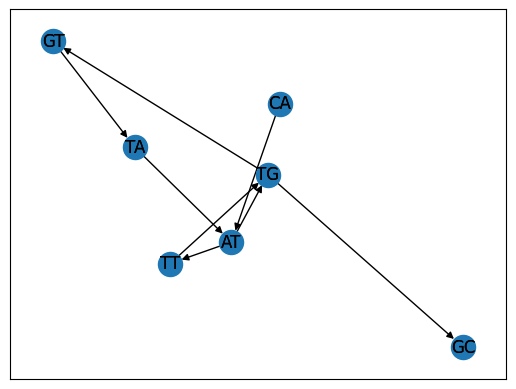

In [2]:
## question 1 eulerian.a
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

sequence = ['CAT', 'ATT', 'ATG', 'TAT', 'TTG', 'TGC', 'TGT', 'GTA']
 
def construct_graph_from(sub):
    G = nx.DiGraph()
    s=[]
    for i in sub:
        s.append(i[0:2])
        s.append(i[1:3])
    G.add_nodes_from(s)

    for (i,j) in  combinations(G.nodes(),2):
        if i[1]==j[0]:
            concat=i[0]+j
            if concat in sub:
                G.add_edge(i,j)
        if j[1]==i[0]:
            concat=j[0]+i
            if concat in sub:
                G.add_edge(j,i)

    
    return G

G = construct_graph_from(sequence) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.out_degree(i)<G.in_degree(i):
        stop= i

G.add_edge(stop,start)


if(nx.is_eulerian(G)):
    print("This graph contains eulerian_circuit")
    cycle=list(nx.eulerian_circuit(G))
    print(cycle)

This graph contains eulerian_circuit
[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]


(b)

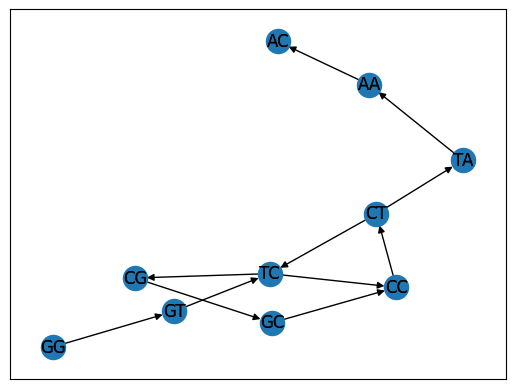

In [4]:
sequence2=['GGT', 'GTC', 'TCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']

G2 = construct_graph_from(sequence2) 
pos2=nx.spring_layout(G2) 
nx.draw_networkx(G2,pos2)
nx.draw_networkx_labels(G2,pos2)
plt.show()
# print(list(G2.nodes())[0])

This graph contains eulerian_circuit
[('GG', 'GT'), ('GT', 'TC'), ('TC', 'CG'), ('CG', 'GC'), ('GC', 'CC'), ('CC', 'CT'), ('CT', 'TA'), ('TA', 'AA'), ('AA', 'AC'), ('AC', 'CT'), ('CT', 'TC'), ('TC', 'CC'), ('CC', 'GG'), ('GG', 'GG')]


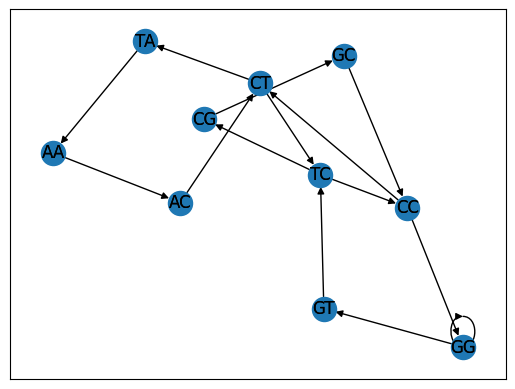

In [5]:

def make_eulerian(Graph):
    start_p=list(Graph.nodes())[0]
    end_p=list(Graph.nodes())[0]
    if(nx.is_eulerian(Graph)):
        print("This graph contains eulerian_circuit")
        cycle=list(nx.eulerian_circuit(Graph))
        print(cycle)
    else:
        G=Graph
        for i in list(G.nodes()):
            if G.in_degree(i)<G.out_degree(i):
                start_p=i
            elif G.out_degree(i)<G.in_degree(i):
                end_p=i
            G.add_edge(end_p,start_p)
        make_eulerian(G)

make_eulerian(G2)
pos2=nx.spring_layout(G2) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G2,pos2)
nx.draw_networkx_labels(G2,pos2)
plt.show()


## Question 2

In [6]:
N = 5 # x row
M = 5 # y column
edges = [(0,0), (0,1), (0,4), (1,1),(1,2), (1,3), (1,4), (2,1),(2,4),(3,1),(4,0),(4,2),(4,3)]
graph = []
for i in range(N):
    graph.append([])
    for j in range(M):
        if (i, j) in edges:
            graph[i].append(1)
        else:
            graph[i].append(0)
print("init board: ")
for i in range(N):
    print(graph[i])
print("")
 
 
 
def find(x, graph, match, used):
    for j in range(M):
        if graph[x][j] == 1 and not used[j]:
            used[j] = True
            if match[j] == -1 or find(match[j], graph, match, used):
                match[j] = x
                return True
    return False
 
match = [-1 for _ in range(M)]
# count the match 
count = 0

for i in range(N):
    used = [False for _ in range(M)]
    if find(i, graph, match, used):
        count += 1
 
print("the biggest amount rook is: ", count)
print("the row number start from x 1 to 5: ", match)

init board: 
[1, 1, 0, 0, 1]
[0, 1, 1, 1, 1]
[0, 1, 0, 0, 1]
[0, 1, 0, 0, 0]
[1, 0, 1, 1, 0]

the biggest amount rook is:  5
the row number start from x 1 to 5:  [0, 3, 4, 1, 2]


### question 2.2

**Approach:**
To adapt the Gale-Shapley algorithm for this new problem, we'll start by constructing artificial preference lists. For each position, rank all acceptable applicants arbitrarily (but uniquely) from most preferred to least preferred, and do similarly for each applicant, ranking all acceptable positions arbitrarily (but uniquely) from most preferred to least preferred. Unacceptable applicants or positions are not included in these lists. Then, run the standard Gale-Shapley algorithm using these artificially constructed preference lists.

**Why This Approach Works:**
The Gale-Shapley algorithm guarantees a stable matching, meaning there are no pairs (position, applicant) such that both would prefer each other over their current assignments. In our modified scenario, as long as an applicant or position is deemed "acceptable", it doesn't matter the order they are ranked, as there's no inherent preference within the set of acceptable choices. By running the Gale-Shapley algorithm on our constructed lists, we ensure that all applicants and positions that deem each other acceptable will be considered for matching, and since the algorithm inherently seeks to maximize the number of stable matches, it will produce a matching of maximum cardinality that is stable under the given acceptability conditions.

### question 2.3

In [7]:
from scipy.optimize import linear_sum_assignment
import numpy as np
 
cost = np.array([[7, 5, 15, 9],
                 [8, 7, 10, 12],
                 [3, 10, 8, 9],
                 [6, 5, 12, 8]])
                 
row_ind, col_ind = linear_sum_assignment(cost)
print('row_ind:', row_ind)  
print('col_ind:', col_ind)  
print('cost:', cost[row_ind, col_ind])  
print('cost_sum:', cost[row_ind, col_ind].sum())  # the min cost

row_ind: [0 1 2 3]
col_ind: [1 2 0 3]
cost: [ 5 10  3  8]
cost_sum: 26


## Question 3

### question 3.1

**Mathematical Formulation:**

**Data:**
1. Let $ c_{ij} $ be the shipping cost of one item from warehouse $ i $ to customer $ j $.
2. Let $ f_i $ be the fixed cost of opening warehouse $ i $.
3. Let $ cap_i $ be the capacity of warehouse $ i $.
4. Let $ d_j $ be the demand of customer $ j $.

**Variables:**
1. Let $ x_i $ be a binary variable which is 1 if warehouse $ i $ is opened, 0 otherwise.
2. Let $ y_{ij} $ be the fraction of demand of customer $ j $ satisfied by warehouse $ i $.

**Objective Function:**  
Minimize total cost = sum of the opening costs + shipping costs  
$ \text{Min} \sum_{i=1}^{6} f_i x_i + \sum_{i=1}^{6} \sum_{j=1}^{10} c_{ij} y_{ij} d_j $

**Constraints:**  
1. Capacity Constraint for each warehouse:
$ \sum_{j=1}^{10} y_{ij} d_j \leq cap_i x_i $ for all $ i $
  
2. Single-sourcing constraint (Each customer's demand must be met by only one warehouse):
$ \sum_{i=1}^{6} y_{ij} = 1 $ for all $ j $
  
3. Binary constraints for the $ x $ variables:
$ x_i \in \{0,1\} $ for all $ i $

4. Fraction of demand constraints for the $ y $ variables:
$ 0 \leq y_{ij} \leq 1 $ for all $ i,j $



In [8]:
c =np.array( [[3,5,8,12,10,11],
     [6,7,10,12,8,10],
     [5,3,8,10,12,10],
     [7,6,7,10,9,5],
     [10,8,5,8,6,5],
     [12,6,4,7,5,4],
     [7,10,6,6,8,3],
     [5,6,9,4,4,7],
     [8,10,7,5,4,6],
     [10,12,8,3,4,6]])

print(c.T)

[[ 3  6  5  7 10 12  7  5  8 10]
 [ 5  7  3  6  8  6 10  6 10 12]
 [ 8 10  8  7  5  4  6  9  7  8]
 [12 12 10 10  8  7  6  4  5  3]
 [10  8 12  9  6  5  8  4  4  4]
 [11 10 10  5  5  4  3  7  6  6]]


In [9]:
from gurobipy import *

# Given data
c =np.array( [[3,5,8,12,10,11],
     [6,7,10,12,8,10],
     [5,3,8,10,12,10],
     [7,6,7,10,9,5],
     [10,8,5,8,6,5],
     [12,6,4,7,5,4],
     [7,10,6,6,8,3],
     [5,6,9,4,4,7],
     [8,10,7,5,4,6],
     [10,12,8,3,4,6]]) 
c=c.T # 6x10 matrix with shipping costs
f = [1750000,2000000,2500000,2250000,1500000,1000000]  # list with fixed costs of opening each warehouse
cap = [75,50,120,100,60,50]  # list with capacities of each warehouse
d = [25, 15, 20, 10, 15, 15, 25, 20, 30, 20]

m = Model("WarehouseSelection")

# Variables
x = m.addVars(6, vtype=GRB.BINARY, name="x")
y = m.addVars(6, 10, vtype=GRB.BINARY, name="y")

# Objective
m.setObjective(quicksum(f[i]*x[i] for i in range(6)) + quicksum(c[i][j]*y[i,j]*d[j] for i in range(6) for j in range(10)), GRB.MINIMIZE)

# Constraints
for i in range(6):
    m.addConstr(quicksum(y[i,j]*d[j] for j in range(10)) <= cap[i], "Capacity_%d" % i)

for j in range(10):
    m.addConstr(quicksum(y[i,j] for i in range(6)) == 1, "SingleSource_%d" % j)

# Solve
m.optimize()

# Display results
for v in m.getVars():
    print(f"{v.varName} = {v.x}")

print(f"Objective Value: {m.objVal}")


Using license file C:\Users\yggdrasilyuan\gurobi.lic
Academic license - for non-commercial use only - expires 2023-10-05
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 16 rows, 66 columns and 120 nonzeros
Model fingerprint: 0x709f5975
Variable types: 0 continuous, 66 integer (66 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [5e+01, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 1470.0000000


Presolve removed 0 rows and 6 columns
Presolve time: 0.01s
Presolved: 16 rows, 60 columns, 120 nonzeros
Variable types: 0 continuous, 60 integer (60 binary)

Root relaxation: objective 7.450000e+02, 10 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     745.0000000  745.00000  0.00%     -    0s

Explored 0 nodes (10 simplex iterations) in 0.07 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 745 1470 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.450000000000e+02, best bound 7.450000000000e+02, gap 0.0000%
x[0] = 0.0
x[1] = 0.0
x[2] = 0.0
x[3] = 0.0
x[4] = 0.0
x[5] = 0.0
y[0,0] = 1.0
y[0,1] = 1.0
y[0,2] = -0.0
y[0,3] = -0.0
y[0,4] = -0.0
y[0,5] = -0.0
y[0,6] = -0.0
y[0,7] = -0.0
y[0,8] = -0.0
y[0,9] = -0.0
y[1,0] = -0.0
y[1,1] = -0.0
y[1,2] = 1.0
y[1,3] = -0.0
y[1,4] = -0.0
y[1,5] = -0.0
y[

### question 3.2

In [10]:
from gurobipy import *
import pandas as pd


def sudoku(matrix):
    model = Model('solve_sudoku')
    #  add variable
    x = model.addVars(9, 9, 9, vtype=GRB.BINARY)
    model.update()
    #  create object
    model.setObjective(1, GRB.MINIMIZE)
    #  add constraint
    model.addConstrs(x[i, j, k] == 1 for i in range(9) for j in range(9) for k in range(9)
                     if isinstance(matrix.at[i, j], int) and k == matrix.at[i, j] - 1)
    model.addConstrs(sum(x.select(i, j, '*')) == 1 for i in range(9) for j in range(9))
    model.addConstrs(sum(x.select(i, '*', j)) == 1 for i in range(9) for j in range(9))
    model.addConstrs(sum(x.select('*', i, j)) == 1 for i in range(9) for j in range(9))
    model.addConstrs(sum(x[i + 3 * I, j + 3 * J, k] for i in range(3) for j in range(3)) == 1
                     for k in range(9) for I in range(3) for J in range(3))

    model.optimize()
    # output
    result = pd.DataFrame()
    for k, v in model.getAttr('x', x).items():
        if v == 1:
            result.at[k[0], k[1]] = k[2] + 1
    return result.astype(int)


if __name__=='__main__':
    matrix = pd.read_excel('.\sudoku.xlsx', index_col=False, header=None, na_filter=False)
    print(sudoku(matrix))
    


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 347 rows, 729 columns and 2939 nonzeros
Model fingerprint: 0xa281a593
Variable types: 0 continuous, 729 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 347 rows and 729 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 1 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%
   0  1  2  3  4  5  6  7  8
0  1  3  6  7  8  2  5  9  4
1  9  8  7  3  5  4  1  2  6
2  5  4  2  6  9  1  3  8  7
3  7  9  8  1  3  5  6  4  2
4  6  2  5  8  4  9  7  1  3
5  3  1  4  2  7  6  8  5  9
6  4  7 